Problem 1 - Looking Back on Scratch

In [52]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Loading the Iris dataset (no need to specify a filename)
data = load_iris()
X = data.data
y = data.target

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model with explicit Input layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer with specified shape
    tf.keras.layers.Dense(10, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2719 - loss: 1.4496 - val_accuracy: 0.5000 - val_loss: 1.2788
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2965 - loss: 1.3990 - val_accuracy: 0.5417 - val_loss: 1.2188
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2715 - loss: 1.4068 - val_accuracy: 0.5417 - val_loss: 1.1620
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2874 - loss: 1.2922 - val_accuracy: 0.5417 - val_loss: 1.1124
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4292 - loss: 1.1413 - val_accuracy: 0.5417 - val_loss: 1.0673
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3681 - loss: 1.1991 - val_accuracy: 0.5417 - val_loss: 1.0259
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3224 - loss: 1.2389 - val_accuracy: 0.5417 - val_loss: 0.9876
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3913 - loss: 1.0676 - val_accuracy: 0.

Problem 2 - Consider the correspondence between scratch and TensorFlow

This code implements a basic neural network workflow: defining the model, training with mini-batches, and evaluating the model's performance.

1. Loading and Preparing Data

- The code uses the Iris dataset and focuses on classifying two species: Iris-versicolor and Iris-virginica.

- It loads the data, selects relevant features (sepal and petal lengths/widths), and then splits it into training, validation, and test sets.

- The target labels are converted from string (species names) to numeric values (0 for Iris-versicolor and 1 for Iris-virginica).

2. Mini-Batch Data Generator

•	A custom class (GetMiniBatch) is created to handle mini-batch generation for training.

•	This class shuffles the data and provides batches of a specified size to the training loop.

3. Neural Network Architecture

•	A simple 3-layer neural network is defined using TensorFlow.

•	Input layer: Takes the features of the Iris dataset.

•	Hidden layers: Two hidden layers with ReLU activation functions. The number of neurons in the first and second layers is specified as 50 and 100, respectively.

•	Output layer: A single output neuron that predicts the probability of the input belonging to Iris-virginica.

4. Optimization and Loss

•	Loss function: The model uses sigmoid_cross_entropy_with_logits to measure how far off the model's predictions are from the true labels.

•	Optimizer: The Adam optimizer is used to minimize the loss function during training.

•	Accuracy: The model's performance is evaluated by comparing predicted and true labels, calculating the accuracy.

5. Training the Model

•	The training loop runs for 100 epochs.

•	In each epoch, the model processes the data in mini-batches. The loss and accuracy are calculated and printed after every batch.

•	After each epoch, the model is evaluated on the validation set.

6. Testing
•	After training, the model's accuracy is evaluated on the test set to check its generalization performance.

Key TensorFlow Concepts:

•	Placeholders: X and Y are placeholders for input data and labels, which will be fed during training.

•	Variables: weights and biases are model parameters that are updated during training.

•	Session: The tf.Session() runs the computational graph, executing operations like training and evaluation


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Loading Iris dataset
df = pd.read_csv("Iris.csv")
df = df[(df["Species"] == "Iris-setosa") | (df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = pd.get_dummies(df["Species"]).values
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Splitting into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Defining a simple neural network model using tf.keras
class SimpleNN(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes):
        super(SimpleNN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(n_hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(n_hidden2, activation='relu')
        self.output_layer = tf.keras.layers.Dense(n_classes)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)

# Defining hyperparameters
learning_rate = 0.001
batch_size = 10
num_epochs = 100

# Initializing model
model_iris = SimpleNN(n_input=X_train.shape[1], n_hidden1=50, n_hidden2=100, n_classes=y_train.shape[1])

# Compiling model for Iris classification (using categorical crossentropy)
model_iris.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Training the model on the Iris dataset
model_iris.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluating on the Iris test set
test_loss_iris, test_acc_iris = model_iris.evaluate(X_test, y_test)
print(f"Iris Test Accuracy: {test_acc_iris:.3f}")

# House prices dataset
house_df = pd.read_csv("USA Housing Dataset.csv")

# Check for any non-numeric columns and handle them
# Let's convert date columns (if any) to numerical values
house_df = house_df.select_dtypes(include=[np.number])

X_house = house_df.drop(columns=["price"])
y_house = house_df["price"].values

# Splitting into train, validation, and test sets
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.2, random_state=0)
X_house_train, X_house_val, y_house_train, y_house_val = train_test_split(X_house_train, y_house_train, test_size=0.2, random_state=0)

# Standardizing the features
X_house_train = scaler.fit_transform(X_house_train)
X_house_val = scaler.transform(X_house_val)
X_house_test = scaler.transform(X_house_test)

# Defining the model for house prices regression
model_house = SimpleNN(n_input=X_house_train.shape[1], n_hidden1=50, n_hidden2=100, n_classes=1)

# Compiling model for House Prices regression (using mean squared error)
model_house.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                    loss=tf.keras.losses.MeanSquaredError())

# Training the model on the House Prices dataset
model_house.fit(X_house_train, y_house_train, validation_data=(X_house_val, y_house_val), epochs=num_epochs, batch_size=batch_size)

# Evaluating on the House Prices test set
test_loss_house = model_house.evaluate(X_house_test, y_house_test)
print(f"House Prices Test Loss: {test_loss_house:.4f}")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4920 - loss: 1.0723 - val_accuracy: 0.8333 - val_loss: 0.8195
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8753 - loss: 0.7650 - val_accuracy: 0.7917 - val_loss: 0.6279
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8512 - loss: 0.5930 - val_accuracy: 0.7917 - val_loss: 0.5289
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8638 - loss: 0.4992 - val_accuracy: 0.7917 - val_loss: 0.4724
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8635 - loss: 0.4040 - val_accuracy: 0.7917 - val_loss: 0.4412
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8673 - loss: 0.3480 - val_accuracy: 0.7917 - val_loss: 0.4160
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8807 - loss: 0.3094 - val_accuracy: 0.7917 - val_loss: 0.3969
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9032 - loss: 0.2688 - val_accuracy: 0.

Visualizing Iris Dataset and House Prices Dataset

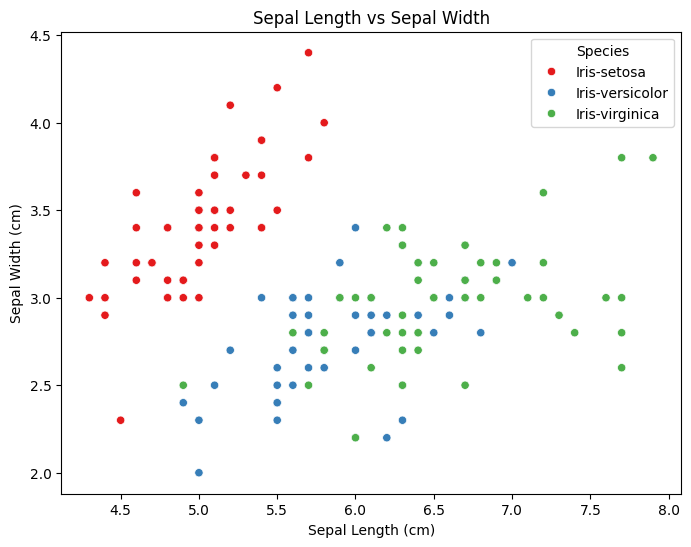

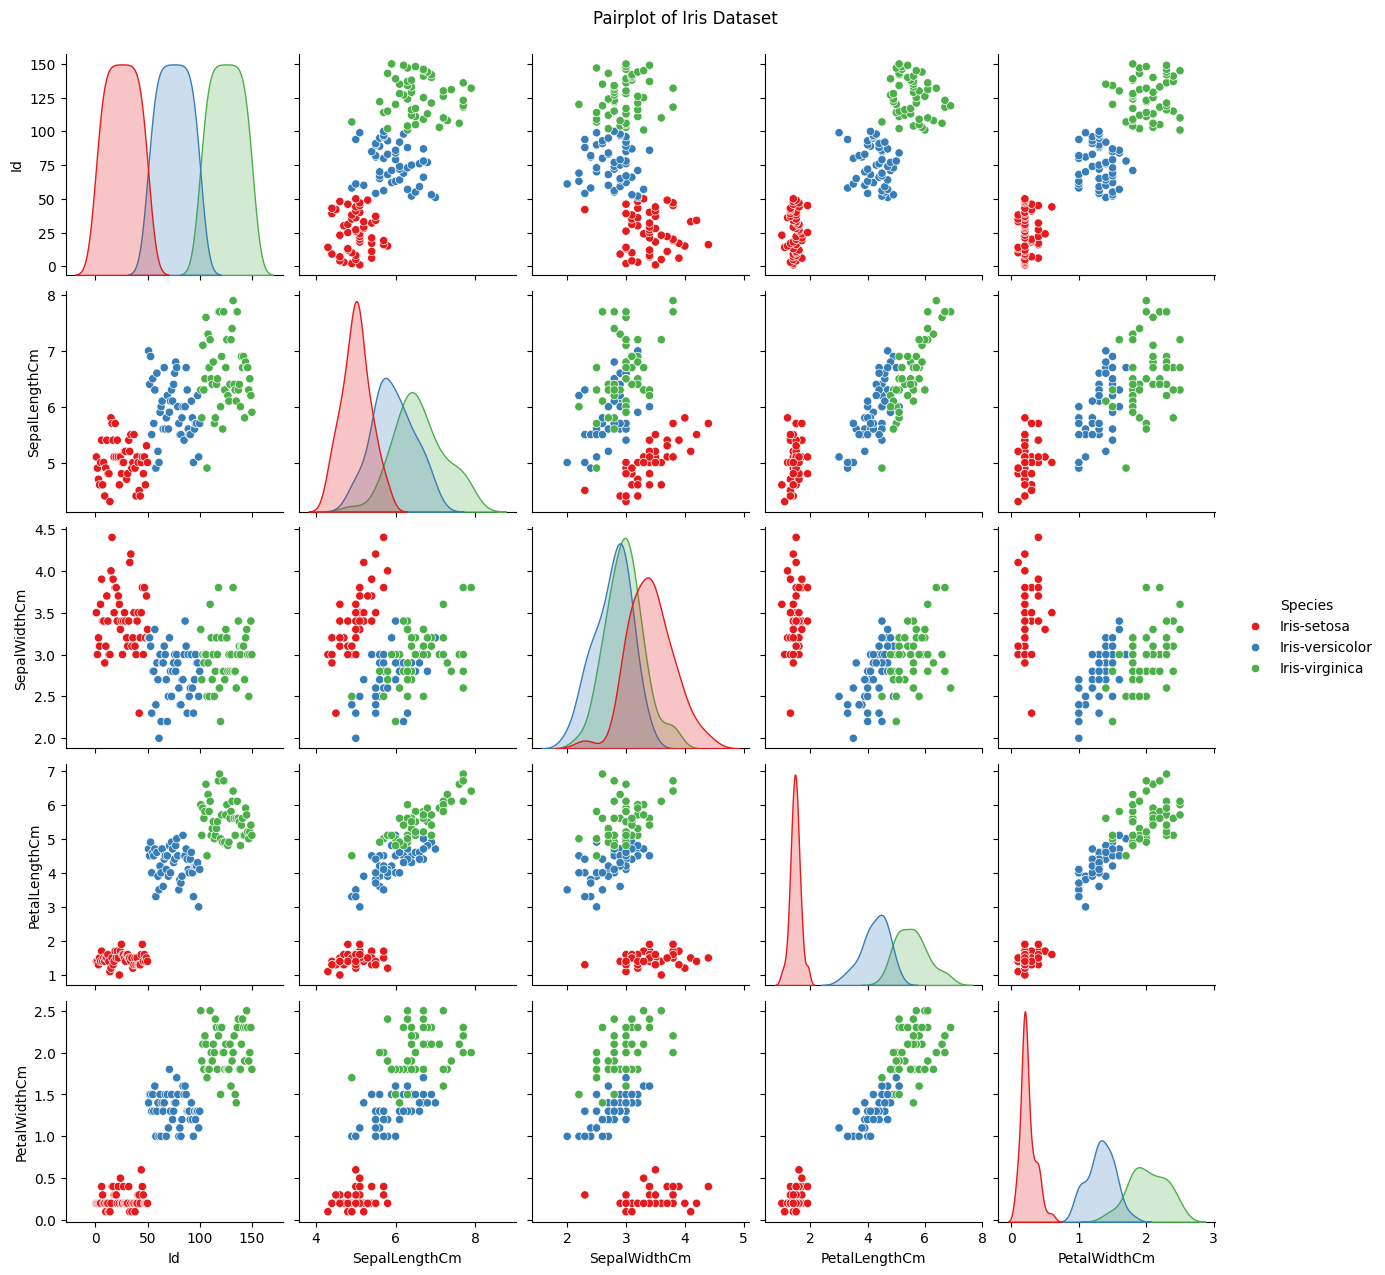

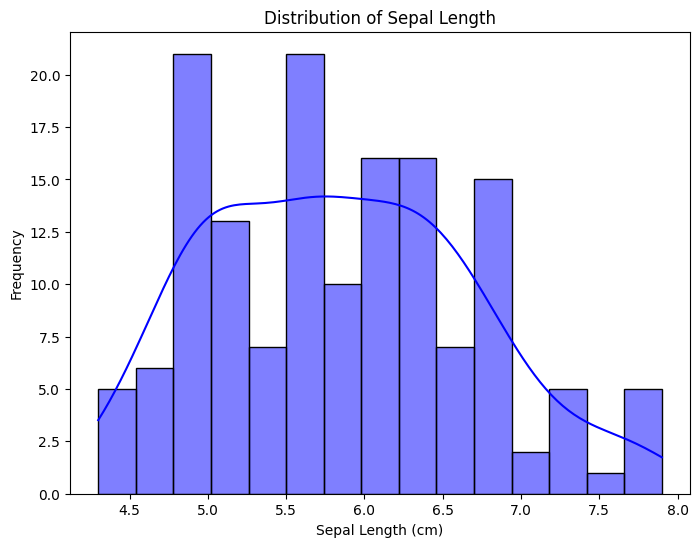

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Visualizing the Iris Dataset
# Load the Iris dataset again
df = pd.read_csv("Iris.csv")
df = df[(df["Species"] == "Iris-setosa") | (df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]

# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="Set1")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Species')
plt.show()

# Pairplot of the Iris dataset
sns.pairplot(df, hue="Species", palette="Set1")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Histogram of Sepal Length
plt.figure(figsize=(8, 6))
sns.histplot(df["SepalLengthCm"], kde=True, color="blue", bins=15)
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()


In [55]:
# 2. Visualizing the House Prices Dataset
import pandas as pd

# Loading the dataset
data = pd.read_csv('USA Housing Dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


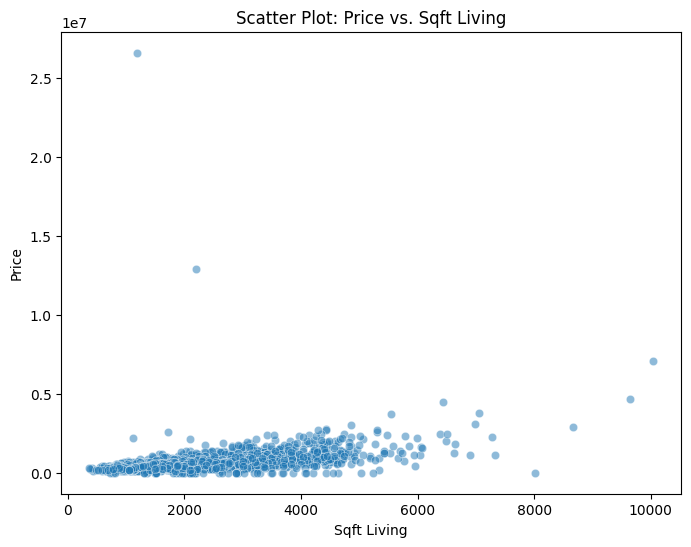

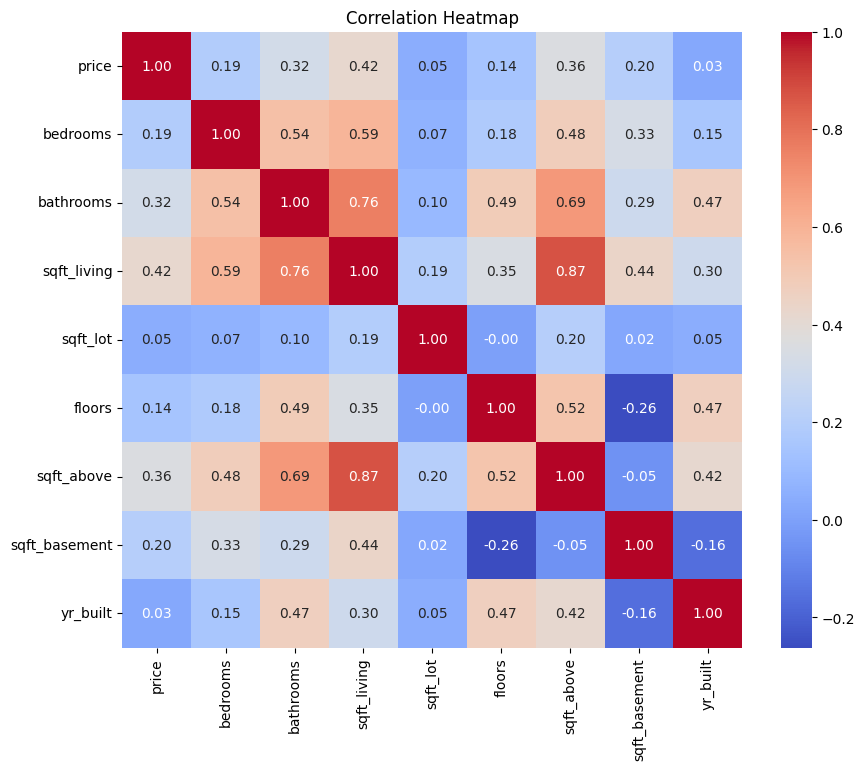

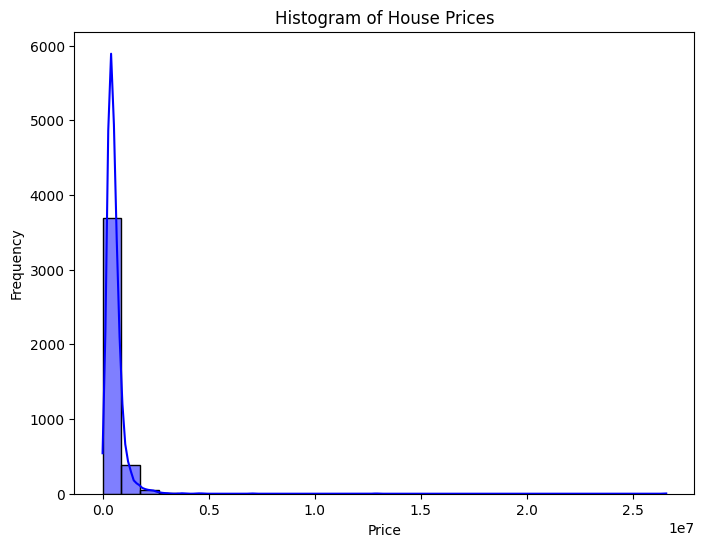

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation and visualization
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'floors', 'sqft_above', 'sqft_basement', 'yr_built']

# Scatter plot: Price vs Sqft Living
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.5)
plt.title('Scatter Plot: Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of house prices
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Problem 3 - Create a model of Iris using all three types of objective variables

In [57]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Drop the Id column
iris_data = iris_data.drop(columns=['Id'])

# Separate features and target variable
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris_data['Species'].values

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define the model
model = Sequential([
    Input(shape=(4,)),  # Specify the input shape here
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)
predicted_classes = tf.argmax(y_pred, axis=1).numpy()

# Map predicted classes back to species names
predicted_species = label_encoder.inverse_transform(predicted_classes)

# Display some predictions
for i in range(5):
    print(f"Actual: {label_encoder.inverse_transform([y_test[i]])[0]}, Predicted: {predicted_species[i]}")


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5257 - loss: 1.1718 - val_accuracy: 0.7500 - val_loss: 0.7939
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8569 - loss: 0.7971 - val_accuracy: 0.7917 - val_loss: 0.7134
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8729 - loss: 0.6813 - val_accuracy: 0.9167 - val_loss: 0.5982
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8435 - loss: 0.5931 - val_accuracy: 1.0000 - val_loss: 0.5871
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9106 - loss: 0.5513 - val_accuracy: 1.0000 - val_loss: 0.5128
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9138 - loss: 0.4976 - val_accuracy: 0.9583 - val_loss: 0.5326
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9043 - loss: 0.4262 - val_accuracy: 1.0000 - val_loss: 0.4610
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8607 - loss: 0.4368 - val_accuracy: 1.0000 - v

Problem 4 - Create a model of House Prices

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv('train.csv')

# Step 2: Inspect the data
print(data.head())
print(data.info())

# Step 3: Select variables and handle missing values
# Use 'GrLivArea' and 'YearBuilt' as explanatory variables
selected_features = ['GrLivArea', 'YearBuilt']
X = data[selected_features]
y = data['SalePrice']

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Drop rows with missing values (if any)
data_cleaned = data.dropna(subset=selected_features + ['SalePrice'])
X = data_cleaned[selected_features]
y = data_cleaned['SalePrice']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Problem 5 - Create a model of MNIST

Epoch 1/10, Loss: 2.303436628712623
Epoch 2/10, Loss: 2.303302349938314
Epoch 3/10, Loss: 2.303175808014744
Epoch 4/10, Loss: 2.3030564776597484
Epoch 5/10, Loss: 2.302943870598978
Epoch 6/10, Loss: 2.302837532824698
Epoch 7/10, Loss: 2.302737042071148
Epoch 8/10, Loss: 2.3026420054879693
Epoch 9/10, Loss: 2.3025520574949323
Epoch 10/10, Loss: 2.3024668578027314
Test Accuracy: 11.35%


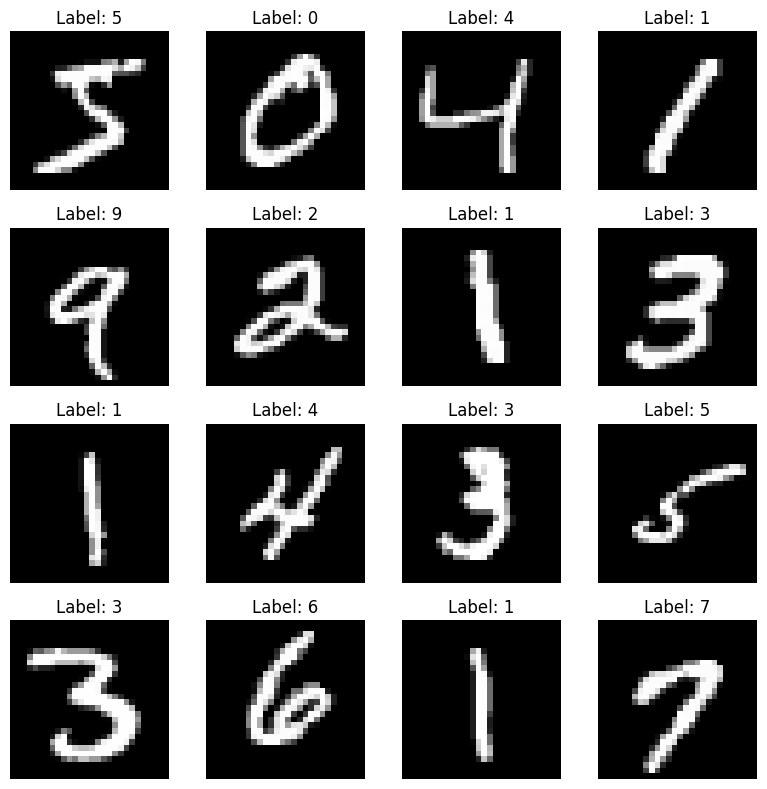

In [59]:
# Scratch-built neural network for MNIST classification
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Step 2: Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, x, y, output):
        m = x.shape[0]
        d_z2 = output - y
        self.d_weights_hidden_output = np.dot(self.a1.T, d_z2) / m
        self.d_bias_output = np.sum(d_z2, axis=0, keepdims=True) / m

        d_a1 = np.dot(d_z2, self.weights_hidden_output.T)
        d_z1 = d_a1 * self.sigmoid_derivative(self.a1)
        self.d_weights_input_hidden = np.dot(x.T, d_z1) / m
        self.d_bias_hidden = np.sum(d_z1, axis=0, keepdims=True) / m

    def update_parameters(self, learning_rate):
        self.weights_input_hidden -= learning_rate * self.d_weights_input_hidden
        self.bias_hidden -= learning_rate * self.d_bias_hidden
        self.weights_hidden_output -= learning_rate * self.d_weights_hidden_output
        self.bias_output -= learning_rate * self.d_bias_output

# Step 3: Train the model
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01
epochs = 10

nn = NeuralNetwork(input_size, hidden_size, output_size)

for epoch in range(epochs):
    output = nn.forward(x_train)
    nn.backward(x_train, y_train, output)
    nn.update_parameters(learning_rate)

    # Compute the loss (cross-entropy)
    loss = -np.mean(np.sum(y_train * np.log(output + 1e-8), axis=1))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Step 4: Evaluate the model
output_test = nn.forward(x_test)
predictions = np.argmax(output_test, axis=1)
labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Function to display a grid of MNIST images
def visualize_data(images, labels, num_samples=16):
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 16 images from the training dataset
visualize_data(x_train[:16].reshape(-1, 28, 28), np.argmax(y_train[:16], axis=1))
